In [14]:
#!pip install pandas

In [15]:
import json
import os
from collections import defaultdict
from typing import Tuple, List
import copy
from pathlib import Path

import data
from data import WifiFingerprint, POSI, WIFI
import make_fingerprint as mf
import pandas as pd

In [16]:
def scatter(fps, mode='region'):
    colors = ['orange','red', 'green', 'blue',  'purple',  'gray']
    x = [fp.latitude for fp in fps]
    y = [fp.longitude for fp in fps]
    if mode == 'region':
        c = [colors[fp.region%len(colors)] if fp.region is not None else 'blue' for fp in fps]
    else:
        c = [colors[fp.last_landmark%len(colors)] for fp in fps]
    import matplotlib.pyplot as plt
    plt.scatter(x,y,color=c)
    
    plt.show()

load: data/T03_01.txt


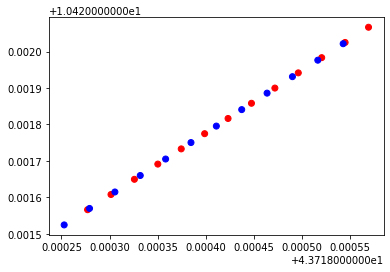

load: data/T03_02.txt


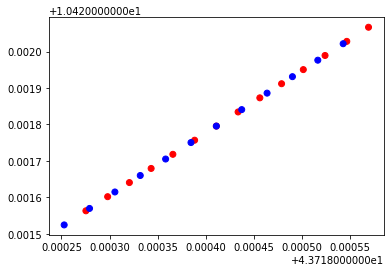

load: data/T03_03.txt


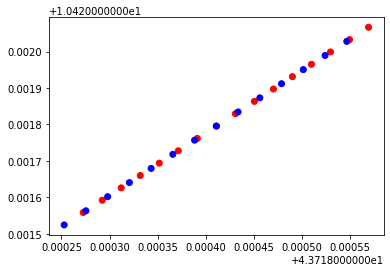

load: data/T03_04.txt


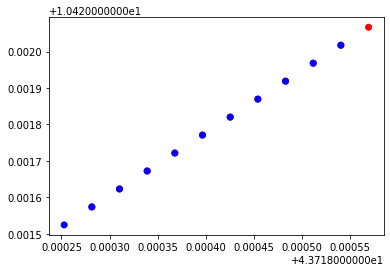

103


In [17]:
trace_log = f"data"
fps = []
for file_name in os.listdir(Path(trace_log)):
    log_file = f"{trace_log}/{file_name}"
    if log_file[-3:].lower() != "txt":
        continue

    print(f"load: {log_file}")
    fps_, posis = mf.bind_wifi_fingerprints(mf.load_logfile(log_file))
    fps_ = mf.fill_latitude_longitude(fps_, posis, exclude_landmark = [None, 2,4])
    scatter(fps_, mode='landmark')
    fps.extend(fps_)

print(len(fps))

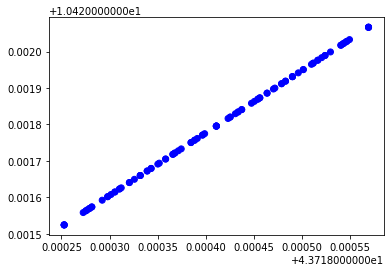

In [18]:
scatter(fps)

In [29]:
fps_new = mf.bucketization(fps)

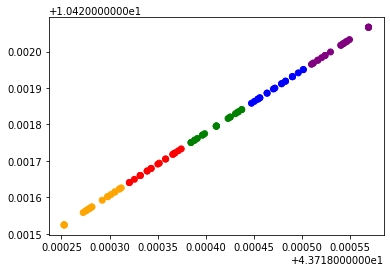

In [30]:
scatter(fps_new)

In [31]:
data.save_fingerprint_as_csv("trace.csv", fps_new)

exported: c:\_shared\workspace\jupyterlab\mlips\doc\day2\trace.csv


In [32]:
df = pd.read_csv("trace.csv")

In [33]:
df.head()

,timestamp,region,latitude,longitude,20:19:00:00:01:39,20:19:00:00:00:93,20:19:00:00:00:38,20:19:00:00:00:63,20:19:00:00:01:24,20:19:00:00:00:53,...,20:19:00:00:00:78,20:19:00:00:00:56,20:19:00:00:00:50,20:19:00:00:03:05,20:19:00:00:01:11,20:19:00:00:00:69,20:19:00:00:01:10,20:19:00:00:00:18,20:19:00:00:01:69,20:19:00:00:03:03
0,61.472,0,43.718277,10.421566,NaN,NaN,-82.0,NaN,NaN,-32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.0,NaN,NaN
1,68.396,0,43.718301,10.421608,NaN,NaN,NaN,-78.0,NaN,-43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.0,NaN,NaN
2,72.410,1,43.718326,10.421649,NaN,NaN,-82.0,-77.0,NaN,-51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN
3,76.387,1,43.718350,10.421691,NaN,NaN,-69.0,-71.0,NaN,-66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN,NaN
4,80.398,1,43.718375,10.421733,NaN,NaN,-54.0,-50.0,NaN,-66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.0,NaN,NaN


In [34]:
df.describe()

,timestamp,region,latitude,longitude,20:19:00:00:01:39,20:19:00:00:00:93,20:19:00:00:00:38,20:19:00:00:00:63,20:19:00:00:01:24,20:19:00:00:00:53,...,20:19:00:00:00:78,20:19:00:00:00:56,20:19:00:00:00:50,20:19:00:00:03:05,20:19:00:00:01:11,20:19:00:00:00:69,20:19:00:00:01:10,20:19:00:00:00:18,20:19:00:00:01:69,20:19:00:00:03:03
count,103.000000,103.000000,103.000000,103.000000,39.000000,28.000000,91.000000,101.000000,27.000000,45.000000,...,2.00000,7.000000,15.000000,5.000000,5.000000,6.000000,6.000000,94.000000,1.0,4.000000
mean,126.582553,2.000000,43.718411,10.421796,-76.102564,-77.107143,-58.263736,-60.584158,-80.777778,-61.800000,...,-86.50000,-79.571429,-83.333333,-68.200000,-86.800000,-81.000000,-83.166667,-58.202128,-76.0,-63.250000
std,43.881492,1.428011,0.000092,0.000158,9.748940,8.171039,12.271770,13.949385,12.959503,16.138041,...,2.12132,12.259107,9.185911,10.756393,3.563706,3.405877,3.816630,12.837763,NaN,1.707825
min,59.810000,0.000000,43.718253,10.421524,-93.000000,-90.000000,-87.000000,-88.000000,-91.000000,-94.000000,...,-88.00000,-93.000000,-92.000000,-87.000000,-90.000000,-87.000000,-89.000000,-86.000000,-76.0,-65.000000
25%,86.811000,1.000000,43.718332,10.421660,-84.000000,-84.000000,-68.000000,-71.000000,-88.000000,-73.000000,...,-87.25000,-87.000000,-89.500000,-67.000000,-89.000000,-81.750000,-85.500000,-68.000000,-76.0,-64.250000
50%,113.787000,2.000000,43.718411,10.421796,-78.000000,-78.500000,-58.000000,-61.000000,-86.000000,-64.000000,...,-86.50000,-82.000000,-86.000000,-64.000000,-88.000000,-80.500000,-81.000000,-58.000000,-76.0,-63.500000
75%,166.800000,3.000000,43.718490,10.421931,-69.500000,-71.250000,-48.500000,-48.000000,-80.000000,-52.000000,...,-85.75000,-75.500000,-82.000000,-62.000000,-86.000000,-79.250000,-81.000000,-47.000000,-76.0,-62.500000
max,205.701000,4.000000,43.718569,10.422067,-56.000000,-61.000000,-32.000000,-34.000000,-50.000000,-31.000000,...,-85.00000,-57.000000,-58.000000,-61.000000,-81.000000,-77.000000,-80.000000,-32.000000,-76.0,-61.000000


In [35]:
df.fillna(-100)

,timestamp,region,latitude,longitude,20:19:00:00:01:39,20:19:00:00:00:93,20:19:00:00:00:38,20:19:00:00:00:63,20:19:00:00:01:24,20:19:00:00:00:53,...,20:19:00:00:00:78,20:19:00:00:00:56,20:19:00:00:00:50,20:19:00:00:03:05,20:19:00:00:01:11,20:19:00:00:00:69,20:19:00:00:01:10,20:19:00:00:00:18,20:19:00:00:01:69,20:19:00:00:03:03
0,61.472,0,43.718277,10.421566,-100.0,-100.0,-82.0,-100.0,-100.0,-32.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-81.0,-100.0,-100.0
1,68.396,0,43.718301,10.421608,-100.0,-100.0,-100.0,-78.0,-100.0,-43.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-80.0,-100.0,-100.0
2,72.410,1,43.718326,10.421649,-100.0,-100.0,-82.0,-77.0,-100.0,-51.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-84.0,-100.0,-100.0
3,76.387,1,43.718350,10.421691,-100.0,-100.0,-69.0,-71.0,-100.0,-66.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-68.0,-100.0,-100.0
4,80.398,1,43.718375,10.421733,-100.0,-100.0,-54.0,-50.0,-100.0,-66.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-51.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,159.835,1,43.718368,10.421722,-100.0,-100.0,-42.0,-43.0,-91.0,-100.0,...,-100.0,-100.0,-92.0,-100.0,-100.0,-100.0,-81.0,-44.0,-100.0,-100.0
99,163.826,1,43.718339,10.421672,-100.0,-100.0,-49.0,-51.0,-100.0,-74.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-49.0,-100.0,-100.0
100,167.815,0,43.718310,10.421623,-100.0,-100.0,-57.0,-65.0,-100.0,-66.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-61.0,-100.0,-100.0
101,171.825,0,43.718282,10.421573,-100.0,-100.0,-100.0,-78.0,-100.0,-60.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-76.0,-100.0,-100.0
